In [1]:
import pandas as pd
import numpy as np
from utils import *
from df_utils import *
from training_utils import *
pd.set_option('display.max_columns', None)

city_info = get_city_info()
city = 'Chicago'    

noaa_path = city_info[city]['noaa']
om_path = city_info[city]['om']
wrh_path = city_info[city]['wrh']
aq_path = city_info[city]['aq']
solar_path = city_info[city]['ss']
attn_lstm_path = city_info[city]['attn_lstm']
lstm_path = city_info[city]['lstm']
scaler_features_path = city_info[city]['scaler']

# Load the data for the city
# all_df is the main dataframe that contains all the data combined. I included subsets of the dataframes as well,
# in case I need them in the future. Predictor is simply the last row. I extracted it so that it does not get
# deleted by dropna.   
daily_df, daily_df_2, daily_df_3, all_df, predictor_final = load_all_dfs(noaa_path, om_path, solar_path, wrh_path, aq_path)

# Daily DF (Combined NOAA and OM) Exploration

In [ ]:
daily_df.head()

In [ ]:
daily_df.tail()

# Daily_DF_2 Exploration

In [ ]:
daily_df_2.head()

In [ ]:
daily_df_2.tail()

# Daily_DF_3 Exploration

In [ ]:
daily_df_3.head()

In [ ]:
daily_df_3.tail()

# All_DF Exploration

In [2]:
all_df.head()

,date,maxtemperature,maxtemperaturenormal,maxtemperaturedeparture,mintemperature,mintemperaturenormal,mintemperaturedeparture,avgtemperature,avgtemperaturenormal,avgtemperaturedeparture,precipitation,precipitationnormal,precipitationdeparture,snowfall,hddnormal,cddnormal,day,month,year,day_of_year,sin_day,cos_day,next_day_max_temp_normal,next_day_min_temp_normal,next_day_avg_temp_normal,next_day_precipitation_normal,next_day_CDD_normal,next_day_HDD_normal,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,weather_code_0.0,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_51.0,weather_code_53.0,weather_code_55.0,weather_code_61.0,weather_code_63.0,weather_code_65.0,weather_code_71.0,weather_code_73.0,weather_code_75.0,next_day_max_temp,max_temp_ma_3,min_temp_ma_3,avg_temp_ma_3,precipitation_ma_3,max_temp_ma_7,min_temp_ma_7,avg_temp_ma_7,precipitation_ma_7,max_temp_ma_14,min_temp_ma_14,avg_temp_ma_14,precipitation_ma_14,max_temp_ma_30,min_temp_ma_30,avg_temp_ma_30,precipitation_ma_30,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1,pressure_set_1d,sea_level_pressure_set_1d,dew_point_temperature_set_1d,wind_cardinal_direction_set_1d_E,wind_cardinal_direction_set_1d_ENE,wind_cardinal_direction_set_1d_ESE,wind_cardinal_direction_set_1d_N,wind_cardinal_direction_set_1d_NE,wind_cardinal_direction_set_1d_NNE,wind_cardinal_direction_set_1d_NNW,wind_cardinal_direction_set_1d_NW,wind_cardinal_direction_set_1d_S,wind_cardinal_direction_set_1d_SE,wind_cardinal_direction_set_1d_SSE,wind_cardinal_direction_set_1d_SSW,wind_cardinal_direction_set_1d_SW,wind_cardinal_direction_set_1d_W,wind_cardinal_direction_set_1d_WNW,wind_cardinal_direction_set_1d_WSW,terrestrial_radiation,terrestrial_radiation_instant,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,us_aqi,us_aqi_pm2_5,us_aqi_pm10,us_aqi_nitrogen_dioxide,us_aqi_carbon_monoxide,us_aqi_ozone,us_aqi_sulphur_dioxide
0,1940-01-31,35.000000,33.2,1.800000,27.0000,19.3,7.7000,31.0,26.2,4.8,0.00,0.04,-0.04,0.00,38.7,0.0,31,1,1940,31,0.508671,0.860961,33.3,19.4,26.4,0.04,0.0,38.6,29.471900,21.551899,21.665722,13.227043,0.0,0.0,35965.450,25941.438,0.0,0.0,0.00,0.0,23.557316,41.760002,214.53758,8.92,0.521725,0,0,0,1,0,0,0,0,0,0,0,0,0,38.000000,30.666667,24.666667,26.100000,0.003333,22.428571,9.571429,25.914286,0.001429,18.142857,4.571429,25.721429,0.002857,22.233333,8.500000,26.000000,0.048000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1940-02-01,38.000000,33.3,4.700000,21.0000,19.4,1.6000,29.5,26.4,3.1,0.00,0.04,-0.04,0.14,38.6,0.0,1,2,1940,32,0.523416,0.852078,33.5,19.6,26.5,0.04,0.0,38.4,30.911900,22.541899,22.470127,14.434853,0.0,0.0,36100.855,9917.310,0.2,0.0,0.14,2.0,17.819090,31.319998,277.45420,6.15,0.498618,0,0,0,0,0,0,0,0,0,0,1,0,0,27.311901,34.000000,24.666667,26.233333,0.000000,26.714286,12.714286,26.014286,0.001429,21.214286,7.142857,25.785714,0.002857,22.966667,9.066667,25.973333,0.048000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1940-02-02,27.311901,33.5,-6.188099,8.7719,19.6,-10.8281,26.5,26.5,0.0,0.70,0.04,0.66,0.49,38.4,0.0,2,2,1940,33,0.538005,0.842942,33.7,19.7,26.7,0.05,0.0,38.3,27.311901,8.771900,17.082521,-3.262825,0.0,0.0,36238.793,32716.812,0.7,0.0,0.49,7.0,31.722921,51.120000,356.30338,12.24,0.729753,0,0,0,0,0,0,0,0,0,0,1,0,0,44.000000,33.437300,18.923967,26.366667,0.233333,

In [3]:
all_df.tail()

,date,maxtemperature,maxtemperaturenormal,maxtemperaturedeparture,mintemperature,mintemperaturenormal,mintemperaturedeparture,avgtemperature,avgtemperaturenormal,avgtemperaturedeparture,precipitation,precipitationnormal,precipitationdeparture,snowfall,hddnormal,cddnormal,day,month,year,day_of_year,sin_day,cos_day,next_day_max_temp_normal,next_day_min_temp_normal,next_day_avg_temp_normal,next_day_precipitation_normal,next_day_CDD_normal,next_day_HDD_normal,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,weather_code_0.0,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_51.0,weather_code_53.0,weather_code_55.0,weather_code_61.0,weather_code_63.0,weather_code_65.0,weather_code_71.0,weather_code_73.0,weather_code_75.0,next_day_max_temp,max_temp_ma_3,min_temp_ma_3,avg_temp_ma_3,precipitation_ma_3,max_temp_ma_7,min_temp_ma_7,avg_temp_ma_7,precipitation_ma_7,max_temp_ma_14,min_temp_ma_14,avg_temp_ma_14,precipitation_ma_14,max_temp_ma_30,min_temp_ma_30,avg_temp_ma_30,precipitation_ma_30,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1,pressure_set_1d,sea_level_pressure_set_1d,dew_point_temperature_set_1d,wind_cardinal_direction_set_1d_E,wind_cardinal_direction_set_1d_ENE,wind_cardinal_direction_set_1d_ESE,wind_cardinal_direction_set_1d_N,wind_cardinal_direction_set_1d_NE,wind_cardinal_direction_set_1d_NNE,wind_cardinal_direction_set_1d_NNW,wind_cardinal_direction_set_1d_NW,wind_cardinal_direction_set_1d_S,wind_cardinal_direction_set_1d_SE,wind_cardinal_direction_set_1d_SSE,wind_cardinal_direction_set_1d_SSW,wind_cardinal_direction_set_1d_SW,wind_cardinal_direction_set_1d_W,wind_cardinal_direction_set_1d_WNW,wind_cardinal_direction_set_1d_WSW,terrestrial_radiation,terrestrial_radiation_instant,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,aerosol_optical_depth,dust,uv_index,uv_index_clear_sky,us_aqi,us_aqi_pm2_5,us_aqi_pm10,us_aqi_nitrogen_dioxide,us_aqi_carbon_monoxide,us_aqi_ozone,us_aqi_sulphur_dioxide
30685,2024-03-19,59.0,48.8,10.2,30.0,32.7,-2.7,44.5,40.7,3.8,0.00,0.05,-0.05,0.00,24.4,0.1,19,3,2024,79,0.977848,0.209315,49.2,33.0,41.1,0.06,0.1,24.1,55.368500,27.198500,44.574210,15.006353,0.0,0.0,43624.504000,36715.613000,0.000000,0.0,0.00,0.0,33.004360,60.479996,244.786040,18.640000,2.971304,0,0,0,1,0,0,0,0,0,0,0,0,0,45.0,46.333333,29.000000,40.366667,0.000000,55.285714,36.428571,39.671429,0.097143,55.000000,37.214286,38.414286,0.102143,56.0,36.266667,35.440000,0.101000,29.783529,40.258824,45.149412,15.975294,238.823529,883.764706,10.000000,986.287647,1009.329412,19.724118,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.352941,0.117647,0.117647,0.294118,146.035174,156.673940,8.211765,5.700000,208.470588,9.588235,2.088235,63.411765,0.104118,0.117647,0.388235,0.420588,19.727329,19.727329,6.180927,4.722338,0.649735,10.371194,1.138623
30686,2024-03-20,45.0,49.2,-4.2,31.0,33.0,-2.0,38.0,41.1,-3.1,0.00,0.06,-0.06,0.00,24.1,0.1,20,3,2024,80,0.981306,0.192452,49.6,33.3,41.4,0.06,0.1,23.7,50.508499,30.528500,42.939369,19.493206,0.0,0.0,43795.097656,40545.015625,0.000000,0.0,0.00,0.0,22.493519,43.199997,310.534973,20.340000,2.802595,0,1,0,0,0,0,0,0,0,0,0,0,0,41.0,47.000000,29.000000,40.733333,0.000000,51.857143,34.000000,40.028571,0.092857,54.642857,36.571429,38.771429,0.102143,56.5,36.833333,35.803333,0.101000,30.001429,37.742857,40.120476,12.439524,229.047619,203.857143,10.000000,993.502381,1016.820952,14.532857,0.190476,0.047619,0.047619,0.142857,0.047619,0.000000,0.285714,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.095238,0.000000,376.293047,374.351084,6.966667,4.847619,231.

In [4]:
all_df.shape

(30690, 120)

In [5]:
predictor_final

date                       2024-03-24 00:00:00
maxtemperature                            50.0
maxtemperaturenormal                      50.8
maxtemperaturedeparture                   -0.8
mintemperature                            33.0
                                  ...         
us_aqi_pm10                           6.975379
us_aqi_nitrogen_dioxide               4.334121
us_aqi_carbon_monoxide                 0.79535
us_aqi_ozone                         11.219658
us_aqi_sulphur_dioxide                1.793893
Length: 120, dtype: object

# Training

c:\Users\kmfoc\My Drive\BU Files\BU Masters\Work\venv\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning:

The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.



Epoch [1/10], Train Loss: 461.1607, Val Loss: 112.7014
Epoch [2/10], Train Loss: 115.4836, Val Loss: 107.6784
Epoch [3/10], Train Loss: 105.5212, Val Loss: 93.9439
Epoch [4/10], Train Loss: 103.2764, Val Loss: 92.8043
Epoch [5/10], Train Loss: 98.1465, Val Loss: 103.2883
Epoch [6/10], Train Loss: 97.7863, Val Loss: 93.8913
Epoch [7/10], Train Loss: 94.5114, Val Loss: 91.1206
Epoch [8/10], Train Loss: 93.2989, Val Loss: 92.7081
Epoch [9/10], Train Loss: 91.4880, Val Loss: 92.4052
Epoch [10/10], Train Loss: 90.7365, Val Loss: 92.6040


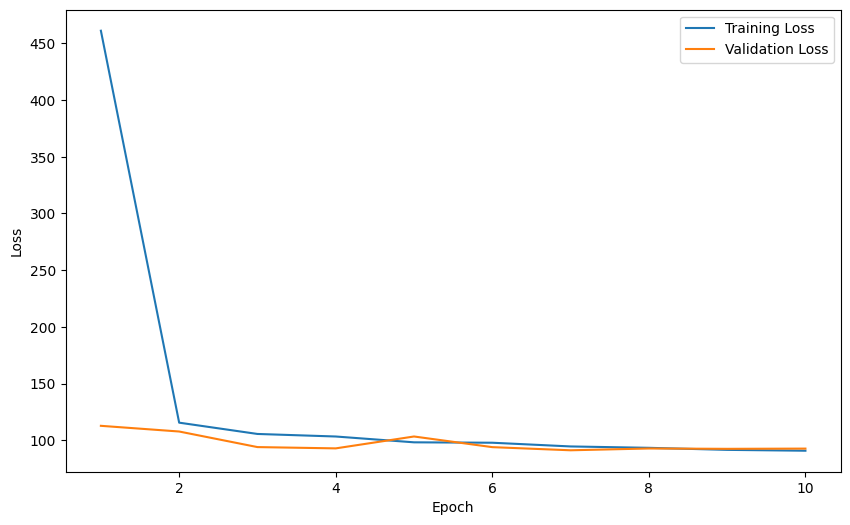

Test Loss: 95.8791
Explained Variance Score: 0.7915
Mean Squared Error: 94.1691
Mean Absolute Error: 7.7298
Standard Error: 9.5826
95% Confidence Interval: 18.7818


In [11]:
from training_utils import *

# Iteration 1
columns_to_ignore = ['date', 'next_day_max_temp']
target_column = 'next_day_max_temp'
#data = daily_df[daily_df['date'] < daily_df_2['date'].min()]
data = all_df
X_train, y_train, X_val, y_val, X_test, y_test, scaler_features = prep_data(data, columns_to_ignore, target_column)
model = get_model(X_train, y_train, dropout_rate=0.2, num_layers=2, hidden_size=32, model_type = 'attn_lstm')
model = train_model(model, X_train, y_train, X_val, y_val, lr=0.005, l2_lambda=0.01, epochs=10)
test_loss = get_test_loss(model, X_test, y_test)
plot_preds(model(X_test), y_test)

In [8]:
# save scaler
import joblib
joblib.dump(scaler_features, f'./models/{city}_scaler_features.pkl')

['./models/Chicago_scaler_features.pkl']

In [12]:
# save model
torch.save(model, f'./models/{city}_attn_lstm.pt')

In [ ]:
# data = daily_df_2[daily_df_2['date'] < daily_df_3['date'].min()]
# X_train, y_train, X_val, y_val, X_test, y_test, scaler_features = prep_data(data, columns_to_ignore, target_column)
# model2 = get_model(X_train, y_train, dropout_rate=0.3)
# model2 = weight_transfer(model2, model)
# model2 = train_model(model2, X_train, y_train, X_val, y_val, epochs=30, lr=0.001)
# test_loss = get_test_loss(model2, X_test, y_test)
# plot_preds(model2(X_test), y_test)

In [ ]:
# data = daily_df_3
# X_train, y_train, X_val, y_val, X_test, y_test, scaler_features = prep_data(data, columns_to_ignore, target_column)
# model3 = get_model(X_train, y_train, dropout_rate=0.3)
# model3 = weight_transfer(model3, model2)
# model3 = train_model(model3, X_train, y_train, X_val, y_val, lr = 0.001, epochs=200, l2_lambda=0.01)
# test_loss = get_test_loss(model3, X_test, y_test)
# plot_preds(model3(X_test), y_test)